In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm

### RNN vs RNNCell in pytorch

In [2]:
model = nn.RNNCell(10, 20)
model

RNNCell(10, 20)

In [3]:
model.weight_ih.shape, model.weight_hh.shape

(torch.Size([20, 10]), torch.Size([20, 20]))

In [4]:
x = torch.randn(5, 10)
h_0 = torch.randn(1,20)

In [5]:
x[0].reshape(1,-1).shape, h_0.shape

(torch.Size([1, 10]), torch.Size([1, 20]))

In [6]:
output = []
for i in range(x.size(0)):
    h_0 = model(x[i].reshape(1,-1), h_0)
    output.append(h_0)

In [7]:
torch.stack(output).shape

torch.Size([5, 1, 20])

In [8]:
output.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
model = nn.RNN(10, 20)
model

In [9]:
h_0 = torch.randn(5,20)

In [10]:
x.unsqueeze(0).shape, h_0.shape

(torch.Size([1, 5, 10]), torch.Size([5, 20]))

In [11]:
out, h_out = model(x.unsqueeze(0), h_0.unsqueeze(0))

RuntimeError: input has inconsistent input_size: got 5 expected 10

In [12]:
out.shape, h_out.shape

NameError: name 'out' is not defined

In [13]:
def generate_time_sequence(T=20, L=1000, N=100):
    np.random.seed(2)
    x = np.empty((N, L), 'int64')
    x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
    data = np.sin(x / 1.0 / T).astype('float64')
    return data

In [14]:
data = generate_time_sequence()

In [15]:
torch.tensor(data).shape

torch.Size([100, 1000])

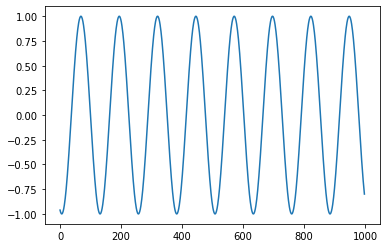

In [16]:
plt.plot(data[3][:-1])

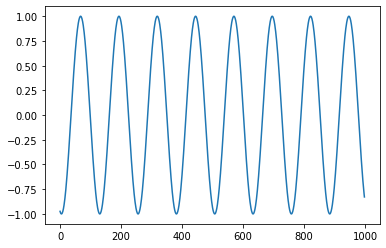

In [17]:
plt.plot(data[3][1:])

In [20]:
class Sequence(nn.Module):
    def __init__(self, input_size=1, hidden_size = 100):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNNCell(input_size, hidden_size)
        self.Linear = nn.Linear(hidden_size, input_size)
    
    def forward(self, x):
        h_0 = torch.zeros(x.size(0), self.hidden_size)
        out = []
        for i in x.split(1,dim=1):
            h_0 = self.rnn(i, h_0)
            out_ = self.Linear(h_0)
            out += [out_]
        return torch.stack(out)

In [21]:
model = Sequence()
model

Sequence(
  (rnn): RNNCell(1, 100)
  (Linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
x = torch.from_numpy(data[3:, :-1]).type(torch.float32)
target = torch.from_numpy(data[3:, 1:]).type(torch.float32)
x_test = torch.from_numpy(data[:3, :-1]).type(torch.float32)
target_test = torch.from_numpy(data[:3, 1:]).type(torch.float32)

In [ ]:
print(x.shape, target.shape)
print(x_test.shape, target_test.shape)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.8)

In [ ]:
epochs=100
for i in tqdm(range(epochs)):
    print(f"Step : {i}")
    def closure():
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out.reshape(97, 999), target)
#         print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    with torch.no_grad():
        pred = model(x_test)
        loss = criterion(pred.reshape(3, 999), target_test)
        print('test loss:', loss.item())
        y = pred.detach().numpy()

In [ ]:
pred.shape

In [ ]:
output = model(x)

In [ ]:
output = output.reshape(97, 999)

In [ ]:
x = output.detach().numpy()

In [ ]:
input_sample = x.detach().numpy()

In [ ]:
plt.plot(input_sample[0][1:])

In [ ]:
plt.plot(x[0][1:])

In [ ]:
class Sequence2(nn.Module):
    def __init__(self, input_size=1, hidden_size = 100):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.Linear = nn.Linear(hidden_size, input_size)
    
    def forward(self, x):
        h_0 = torch.zeros(x.size(0), self.hidden_size)
        out = []
        for i in x.split(1,dim=1):
            h_0 = self.rnn(i, h_0)
            out_ = self.Linear(h_0)
            out += [out_]
        return torch.stack(out)